In [1]:
import geopandas as gpd

In [2]:
# reading the world shapefile(shp file)
world_data = gpd.read_file(r'C:\Users\Rabbil\Documents\GeoPython\Visualizing Geographical Data\world.shp')

In [3]:
world_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [4]:
# chekcing hte data frame
# we have got the dataframe as geodataframe due to inclusiong of special geometry column
type(world_data)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

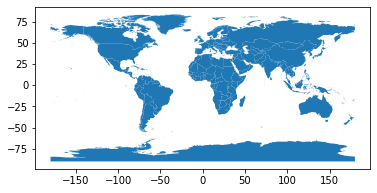

In [6]:
# Plotting the world map 
#!pip install matplotlib
#!pip install descartes
world_data.plot()

In [7]:
world_data.columns

Index(['FIPS', 'ISO2', 'ISO3', 'UN', 'NAME', 'AREA', 'POP2005', 'REGION',
       'SUBREGION', 'LON', 'LAT', 'geometry'],
      dtype='object')

In [10]:
# sub data of world_data
world_data = world_data[['NAME','geometry']]

In [11]:
# calculating the area of each country
world_data['Area'] = world_data.area

C:\Users\Rabbil\anaconda3\envs\geopandas_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [12]:
world_data.columns

Index(['NAME', 'geometry', 'Area'], dtype='object')

In [13]:
world_data
# here the geometric data is in decimal point

,NAME,geometry,Area
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093
...,...,...,...
241,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",0.004696
242,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",0.009359
243,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722...",0.015408
244,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",0.542074


<AxesSubplot:>

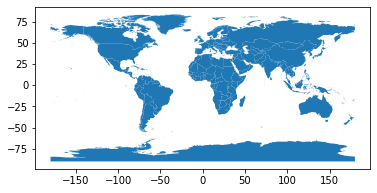

In [15]:
# plotting the world 
world_data.plot()

<AxesSubplot:>

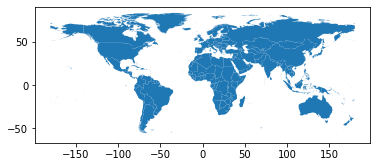

In [17]:
# Removing Antartica form the geopandas dataframe
world_data = world_data[world_data['NAME'] != 'Antarctica']
world_data.plot()

In [19]:
# changing the projection
# i want to know what kind of projection is assigned in my current shape file

In [20]:
#current cooridante systems
current_crs = world_data.crs
current_crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# convert the shape file into cordinate projected file so that we can get the area by meter 
world_data.to_crs(epsg=3857, inplace =True) # epsg = 3857 will give us area in meter unit

<AxesSubplot:>

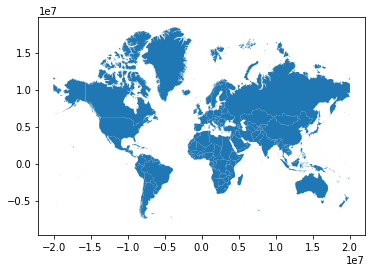

In [22]:
world_data.plot()

In [23]:
# so we transfered the map into projected cordinated system (with stretch)
# With comparaison with earlier map- it was geographic cordinated system

In [24]:
# after changing the projection we will get the geometric data as meters
world_data.head()

,NAME,geometry,Area
0,Antigua and Barbuda,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",0.046183
1,Algeria,"POLYGON ((329907.556 4411573.988, 331886.705 4...",213.512502
2,Azerbaijan,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",9.100912
3,Albania,"POLYGON ((2163629.445 5015449.243, 2165225.767...",3.075918
4,Armenia,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",3.142093


<AxesSubplot:>

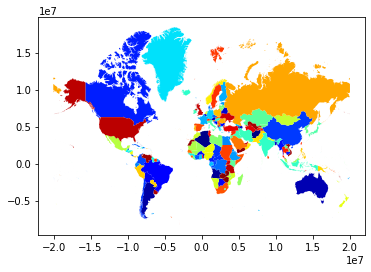

In [25]:
# Colouring the map based on countries
world_data.plot(column='NAME', cmap='jet') # matplotlib colorplots

In [26]:
# recalculate the areas in squre km
world_data['Area'] = world_data.area/1000000
world_data.head()


,NAME,geometry,Area
0,Antigua and Barbuda,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",5.993606e+02
1,Algeria,"POLYGON ((329907.556 4411573.988, 331886.705 4...",3.014479e+06
2,Azerbaijan,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",1.478874e+05
3,Albania,"POLYGON ((2163629.445 5015449.243, 2165225.767...",5.062603e+04
4,Armenia,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",5.104906e+04


<AxesSubplot:>

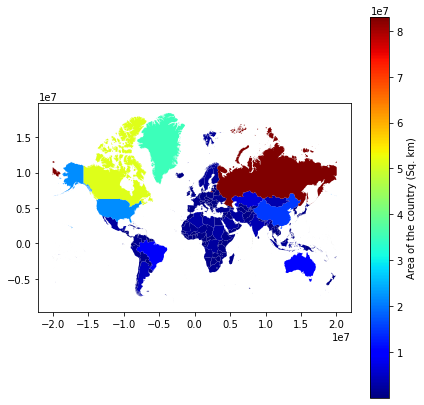

In [30]:
# Adding a legend
world_data.plot(column ='Area', cmap ='jet', legend = True,
               legend_kwds = {'label':'Area of the country (Sq. km)'},
               figsize=(7,7))

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

<AxesSubplot:>

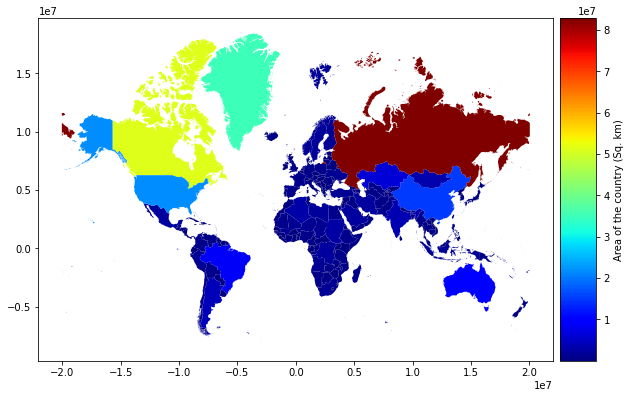

In [36]:
# resizing the legend
fig, ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='7%', pad=0.1)
world_data.plot(column ='Area', cmap ='jet', legend = True,
               legend_kwds = {'label':'Area of the country (Sq. km)'},
               ax=ax, cax=cax)